### Importing Library

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import plotly.express as px
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols


/Users/dominicabogado/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Importing Data

In [2]:
df = pd.read_csv('diabetes.csv')

## Data Cleaning

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

The decribe function showed that there were numerous minimum values of 0 in categories where it did not make sense such as Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI. These values were replaced using the mean value of each category

In [5]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

Once the values had been replaced, describe was used again to show there were no longer any 0 values in the categories where it made no sense.

In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
new_df = df[['Pregnancies','Age','Glucose','Insulin','BMI','Outcome']]
df_with = new_df[new_df['Outcome'] == 1]
df_without = new_df[new_df['Outcome'] == 0]

category= pd.cut(new_df.Pregnancies,bins=[-1,0,6,17],labels=['None','Average','High'])
new_df.insert(1,'PregnantCategory',category)


## Histogram Plot

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=5,figsize=(20,10))
sns.histplot(data=df, x="Pregnancies", ax=axs[0])
sns.histplot(data=df, x="Insulin", ax=axs[1])
sns.histplot(data=df, x="Age", ax=axs[2])
sns.histplot(data=df, x="Glucose", ax=axs[3])
sns.histplot(data=df, x="BMI", ax=axs[4])
plt.show()
plt.draw()
plt.savefig('Hist.png')

<Figure size 432x288 with 0 Axes>

## Data Analysis

The first step in data analysis was to create a correlation matrix to find interesting relationships between the outcome and pregnancies.

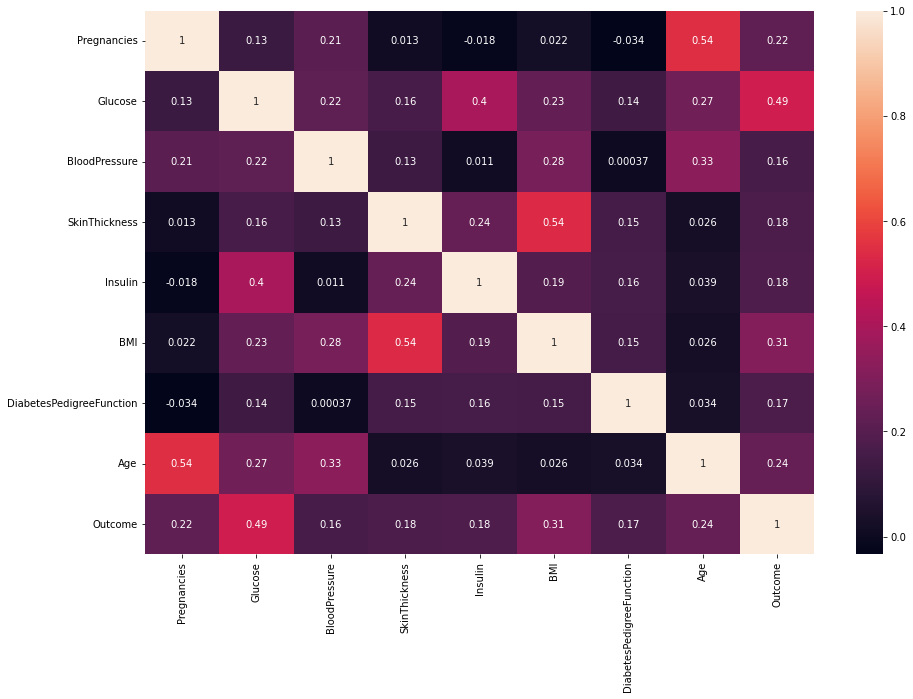

In [9]:
corr_matrix = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix,annot = True);
plt.savefig('DiabetesHeatMap.png')

By looking at correlation matrix, we can see that the variable with the highest correlation to Outcome is Glucose. Additionally, the variables with the highest correlation to Glucose was Age and Insulin. Lastly, Age and Pregnancies had the highest correlation of all variables

The next step was to compare the diabetes diagnosis across the number of pregnancies

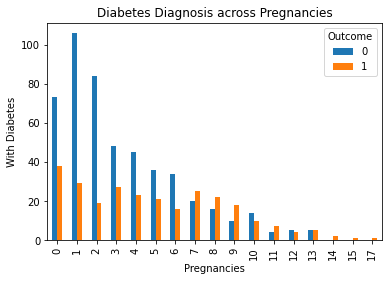

In [10]:
%matplotlib inline
pd.crosstab(df.Pregnancies,df.Outcome).plot(kind='bar')
plt.title('Diabetes Diagnosis across Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('With Diabetes')
plt.savefig('PregnantComp.png')

This graph shows that between the women who have been pregnant 0 to 6 times, more did not have diabetes. It also showed that there were more women with diabetes who had been pregnant 7 or more times than without diabetes.

A box plot was created to visualize the difference of means in pregnancy, age, insulin, and glucose between those with and without diabetes


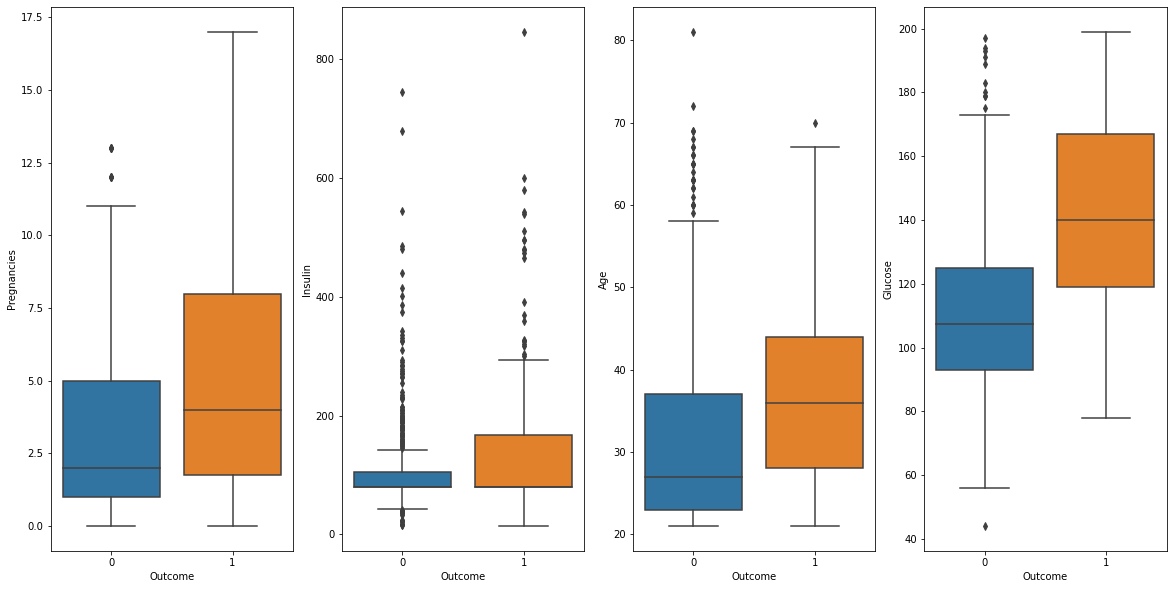

<Figure size 432x288 with 0 Axes>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=4,figsize=(20,10))
sns.boxplot(data=df, y="Pregnancies", x="Outcome", ax=axs[0])
sns.boxplot(data=df, y="Insulin", x="Outcome", ax=axs[1])
sns.boxplot(data=df, y="Age", x="Outcome", ax=axs[2])
sns.boxplot(data=df, y="Glucose", x="Outcome", ax=axs[3])
plt.show()
plt.draw()
plt.savefig('BoxPlot.png')

We can see that there is a difference in the means across these variables. To verify if the means are significant, TTests were run to find the P-Value and Cohens D.


## ANOVA Models

In [12]:
aov = pg.anova(data=new_df, dv='Pregnancies', between='Outcome', detailed=True)
print(aov)

    Source           SS   DF          MS          F         p-unc       np2
0  Outcome   428.799019    1  428.799019  39.670227  5.065127e-10  0.049239
1   Within  8279.762179  766   10.809089        NaN           NaN       NaN


In [13]:
aov = pg.anova(data=new_df, dv='Age', between='Outcome', detailed=True)
print(aov)

    Source             SS   DF           MS          F         p-unc       np2
0  Outcome    6026.695153    1  6026.695153  46.140611  2.209975e-11  0.056814
1   Within  100051.741045  766   130.615850        NaN           NaN       NaN


In [14]:
aov = pg.anova(data=new_df, dv='Insulin', between='Outcome', detailed=True)
print(aov)

    Source            SS   DF             MS          F         p-unc  \
0  Outcome  2.133615e+05    1  213361.496162  25.410089  5.788430e-07   
1   Within  6.431890e+06  766    8396.723812        NaN           NaN   

        np2  
0  0.032107  
1       NaN  


In [15]:
aov = pg.anova(data=new_df, dv='Glucose', between='Outcome', detailed=True)
print(aov)

    Source             SS   DF             MS           F         p-unc  \
0  Outcome  172624.903137    1  172624.903137  245.833856  2.937418e-48   
1   Within  537886.350890  766     702.201502         NaN           NaN   

        np2  
0  0.242959  
1       NaN  


In comparing the means of pregnancies, age, insulin, and glucose between those with and without diabetes we can see a P-Value below 0.05 across all three variables. We can conclude that there is a significant difference of means across groups. Post Hoc tests must now be conducted to observe the effect size of the means.

## Post-Hoc Tests to observe effect size

In [44]:
pt = pg.pairwise_tukey(dv='Pregnancies', between='Outcome', effsize = 'cohen', data=new_df)
print(pt)

   A  B  mean(A)   mean(B)      diff        se         T  p-tukey     cohen
0  0  1    3.298  4.865672 -1.567672  0.248899 -6.298431    0.001 -0.476827


In [45]:
new_df.pairwise_tukey(dv='Age', between='Outcome', effsize='cohen')

A  B  mean(A)    mean(B)      diff        se         T  p-tukey     cohen
0  0  1    31.19  37.067164 -5.877164  0.865219 -6.792688    0.001 -0.514245

In [46]:
new_df.pairwise_tukey(dv='Insulin', between='Outcome', effsize='cohen')

A  B     mean(A)     mean(B)       diff        se         T  p-tukey  \
0  0  1  106.457354  141.426597 -34.969243  6.937183 -5.040842    0.001   

     cohen  
0 -0.38162

In [47]:
new_df.pairwise_tukey(dv='Glucose', between='Outcome', effsize='cohen')

A  B     mean(A)     mean(B)       diff       se         T  p-tukey  \
0  0  1  110.705367  142.159661 -31.454293  2.00613 -15.67909    0.001   

      cohen  
0 -1.186995

### Anova Observations

Though we found statistical significance between the means, a Post Hoc test was conducted to evaluate the effect size.  Pregnancies and Insulin had medium effect sizes while Age had a large effect size. Glucose had the largest Cohen D with -1.186 meaning the mean is larger than one standard deviation from the mean.

Using the results of the ANOVA and Post-Hoc tests, we can speculate that there is an increased chance that women who had been pregnant more often were also diagnosed with some form of diabetes. This also supports the data that suggests women with gestational diabetes are more likely to contract Type 2 diabetes. 


## ANCOVA MODELS

From our ANOVA test we speculated that women who had been pregnant multiple times were more likely to be diagnosed with diabetes. The ANCOVA i would like to test is if pregnancies were accounted for, how Glucose levels would be impacted.


https://nathancarter.github.io/how2data/site/how-to-perform-an-analysis-of-covariance-ancova-in-python-using-pingouin/

In [48]:
from pingouin import ancova
ancova(data=new_df, dv='Glucose', covar='Pregnancies', between='Outcome')

Source             SS   DF           F         p-unc       np2
0      Outcome  161248.681853    1  229.443426  1.594666e-45  0.230725
1  Pregnancies     258.214778    1    0.367418  5.445948e-01  0.000480
2     Residual  537628.136113  765         NaN           NaN       NaN

As we can see here the covariate of pregnancies has a p-value greater than 0.05 so we conclude that it is not significant in predicting glucose. We can see however that Glucose and Outcome has a p-value much smaller than 0.05

There remains to be a thread worth investigating 

In [49]:
ancova(data=new_df, dv='Insulin', covar='Pregnancies', between='Outcome')

Source            SS   DF          F         p-unc       np2
0      Outcome  2.345741e+05    1  28.001718  1.584410e-07  0.035311
1  Pregnancies  2.338535e+04    1   2.791570  9.517037e-02  0.003636
2     Residual  6.408505e+06  765        NaN           NaN       NaN

In [50]:
ancova(data=new_df, dv='BMI', covar='Pregnancies', between='Outcome')

Source            SS   DF          F         p-unc       np2
0      Outcome   3605.212299    1  84.511067  3.543668e-19  0.099482
1  Pregnancies     86.922114    1   2.037572  1.538624e-01  0.002656
2     Residual  32634.629964  765        NaN           NaN       NaN

### ANCOVA only using data of women who have been pregnant  before

In [51]:
df_preg = new_df[new_df['Pregnancies'] > 0]

In [52]:
ancova(data=df_preg, dv='Glucose', covar='Pregnancies', between='Outcome')

Source             SS   DF           F         p-unc       np2
0      Outcome  130537.273778    1  182.543338  7.284642e-37  0.218211
1  Pregnancies     809.945874    1    1.132628  2.876082e-01  0.001729
2     Residual  467677.309215  654         NaN           NaN       NaN

In [53]:
ancova(data=new_df, dv='BMI', covar='Pregnancies', between='Outcome')

Source            SS   DF          F         p-unc       np2
0      Outcome   3605.212299    1  84.511067  3.543668e-19  0.099482
1  Pregnancies     86.922114    1   2.037572  1.538624e-01  0.002656
2     Residual  32634.629964  765        NaN           NaN       NaN

In [54]:
df_preg = new_df[new_df['Pregnancies'] > 4]

In [55]:
ancova(data=df_preg, dv='Glucose', covar='Pregnancies', between='Outcome')

Source             SS   DF          F         p-unc       np2
0      Outcome   52189.828803    1  64.805461  2.563143e-14  0.191843
1  Pregnancies     329.440775    1   0.409075  5.229756e-01  0.001496
2     Residual  219855.287732  273        NaN           NaN       NaN

In [56]:
new_df['Pregnancies'].mean()

3.8450520833333335

### Discussion

The next hypothesis to examine was the significance of number of pregnancies on multiple diabetes predictors.

Above is a series of calculations meant to find a significant p-value which correlated pregnancies with the diabetes predictors such as Glucose, BMI, and Insulin. The first ANCOVA looks at glucose levels when pregnancies have been adjusted for. The results showed that with an p-value of over 0.05, we can accept the null hypothese that glucose and pregnancies are not related. That being said, we can still see a significant relationship between glucose and pregnancies.

Next was to run an ANCOVA only using data from women who have been pregnant before. With a p-value greater than 0.05 we can conclude that even amongst women who have been pregnant, it is still not a significant predictor of glucose. 

Finally, an ANVOCA was used on the dataset of women who had been pregnant more than 4 times. The mean number of pregnancies in the database was 3.845. Again the results of the ANCOVA showed that pregnancy had very little impact

In every calculation the p-vaue was greater than 0.05. We can speculate that although there was a significance of the mean number of pregnancies between those with and without diabetes, Pregnancies are not a significant predictor of glucose levels.

Using the results of the ANOVA and ANCOVA, we can infer that the number of pregnancies did contribute to a diabetes diagnosis but it was not the only or most important factor.

Additionally we can infer that because of the poor socio economic status of the Pima Indians, families try to have more children in order to receive more child care benefits from the government. Lower income families tend to have a less healthy diet, sticking to cheaper, more processed alternatives. Poor eating habits form at an early age which results in a higher chance of developing diabetes.


## Power 

Since the results of the ANCOVA showed that pregnancy is not a significant predictor of glucose levels, we will go back and assess the power of the pregnancy data. We hope to show that there is a signficant difference in means of pregnancies between those with and without diabetes. 

In [57]:
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

To remain consistent with previous calculations, we will accept a power level of 80%, signficance level of 0.05 and expected effect size of 0.8.

The goal of this calculation is to show the required sample size.

In [58]:
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


As we can see above, a minimum of 25.52 samples must be collected. The diabetes dataset contains 768 samples so we are well above the required size. 

To show how power increases with observations the following plots were produced.

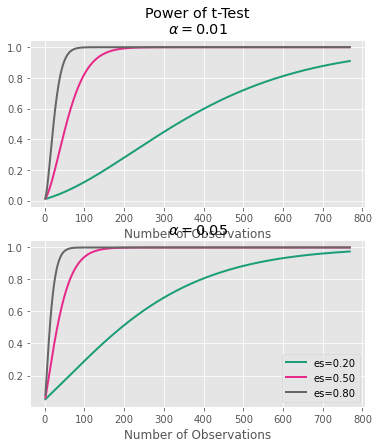

In [59]:
# power vs. number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 769),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$'
                                )
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 769),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)

From these graphs we can infer that for the small/medium/large thresholds defined in the case of Cohen's d, the observations in our dataset will still have a power at or nearing 1.0

In [60]:
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
power_calc = power_analysis.power(0.8, 768, alpha)
print(power_calc)

1.0


## Parameter Estimates

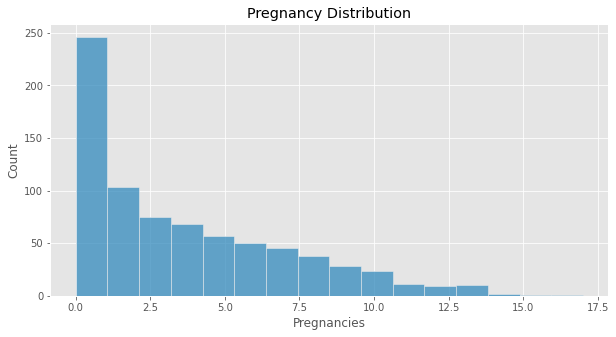

<Figure size 432x288 with 0 Axes>

In [61]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Pregnancy Distribution')
sns.histplot(new_df['Pregnancies'])
plt.show()

plt.savefig('pregnancyDistribution.png')

In [34]:
new_df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

The pregnancy data has a positive skewed distrbution with the mean number of pregnancies as 3.34, standard deviation of 3.39, minimum value of 0 and maximum value of 17. 

The welch ANOVA post-hoc will be used to account for the non-parametic test

## Welch ANOVA

In [35]:
welchAnova = pg.welch_anova(data=new_df, dv='Pregnancies', between="Outcome")
print(welchAnova)

    Source  ddof1      ddof2          F         p-unc       np2
0  Outcome      1  455.95578  34.892194  6.821926e-09  0.049239


The Welch ANOVA still gave a p-value less than 0.05 so we can still assume a significant difference of mean number of pregnancies between those with diabetes and without diabetes.

## Linear Regression model

We know from the analysis that Glucose has significance to Diabetes. This linear regression model was developed to explore if Glucose levels can be predicted using Pregnancies, Age and Insulin.

In [36]:
X = new_df[['Pregnancies', 'Age','Insulin']]
y = new_df['Glucose']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Pregnancies    -0.148041
Age             0.716549
Insulin         0.122853

In [40]:
y_pred = regressor.predict(X_test)

In [41]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual   Predicted
661   199.0  108.819537
122   107.0  111.869736
113    76.0  110.525060
14    166.0  140.702938
529   111.0  115.416515
..      ...         ...
476   105.0  127.348637
482    85.0  108.890902
230   142.0  108.375415
527   116.0  113.052508
380   107.0  110.522974

[154 rows x 2 columns]

In [42]:
print (regressor.score(X_test, y_test))

0.17438289303971344


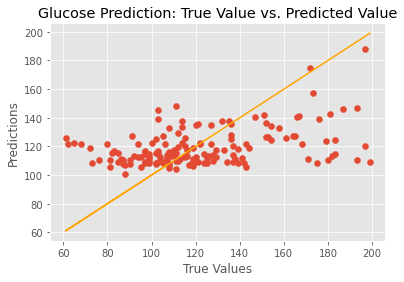

In [43]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Glucose Prediction: True Value vs. Predicted Value")


a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, y_test, color='orange')


plt.savefig('NewGlucoseResults.png')

The linear regression model only has a 17% accuracy. The visualization shows that the model was accurate when predicting Glucose levelsbeterrn 110 to 120 however over predicted when Glucose levels were in the low 60's to 80's and under predicted when glucose levels were above 160.

In conclusion, tho pregnancies, age, and insulin are significant variables in patients with diabetes, they are not ideal when predicting Glucose levels.